<a href="https://colab.research.google.com/github/raghadalmasri/Projects/blob/main/BigMart_Sales_Raghad_ALmasri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data
"https://www.kaggle.com/brijbhushannanda1979/bigmart-sales-data"

'https://www.kaggle.com/brijbhushannanda1979/bigmart-sales-data'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Train.csv",skipinitialspace=True)

In [ ]:
data.shape

(8523, 12)

In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
data.info()

#float64 ----> Numerical/Continous
#int64 ------> Numerical/Discriete
#object -----> Categorial

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
#data.describe(include=np.object)
data.describe(include=['object'])

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDG33,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


# EDA 

In [ ]:
# How much unique items do we have (use Item_Identifier)
data.Item_Identifier.nunique()

1559

In [ ]:
# How much establishment years do we have
data.Outlet_Establishment_Year.nunique()

9

In [ ]:
# How much Item types do we have
data.Item_Type.nunique()

16

In [ ]:
# Find the missing values by percentage, sorted from biggest to smallest 
(data.isnull().sum()*100/len(data)).sort_values(ascending=False)

Outlet_Size                  28.276428
Item_Weight                  17.165317
Item_Outlet_Sales             0.000000
Outlet_Type                   0.000000
Outlet_Location_Type          0.000000
Outlet_Establishment_Year     0.000000
Outlet_Identifier             0.000000
Item_MRP                      0.000000
Item_Type                     0.000000
Item_Visibility               0.000000
Item_Fat_Content              0.000000
Item_Identifier               0.000000
dtype: float64

In [ ]:
# What is the numbers of categories for each feature with type object

#data.describe(include=np.object)
data.loc[:,data.dtypes==object].nunique() #******************************


Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [ ]:
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
# What is the item with the highest price, and what is that price
Highest_price=data['Item_MRP'].max()
print(Highest_price)
d=data[data['Item_MRP']==Highest_price]
d['Item_Identifier']

266.8884


4802    FDS13
5884    FDR25
Name: Item_Identifier, dtype: object

In [ ]:
for i in range(len(data)): #0 1 2 3 4 ................... 
  if (data.loc[i,'Item_Fat_Content']=='Low Fat') | (data.loc[i,'Item_Fat_Content']=='low fat') | (data.loc[i,'Item_Fat_Content']=='LF'):
    data.loc[i,'Item_Fat_Content']='Low Fat'

  if (data.loc[i,'Item_Fat_Content']=='Regular') | (data.loc[i,'Item_Fat_Content']=='reg'):
    data.loc[i,'Item_Fat_Content']='Regular'


In [ ]:
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
# Numbers of unique items that has a low fat
low_Fat_Items=data[(data['Item_Fat_Content']=='Low Fat')]
len(low_Fat_Items.Item_Identifier.value_counts())

1008

In [ ]:
# The most item that is being sale in the Grocery Store (use Outlet_Identifier)

Grocery_Store_data=data[data['Outlet_Type']=='Grocery Store']
max_Item_sales=Grocery_Store_data.Item_Outlet_Sales.max()
Grocery_Store_data[Grocery_Store_data['Item_Outlet_Sales']==max_Item_sales]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7759,NCK30,14.85,Low Fat,0.102066,Household,254.2698,OUT010,1998,NaN,Tier 3,Grocery Store,1775.6886


In [ ]:
# #(use Outlet_Identifier)

# new_data = data[data['Outlet_Type']=='Grocery Store'].groupby(['Outlet_Identifier'])
# max_value = new_data.Item_Outlet_Sales.max()
# for i in [0,1]:
#   new_data[new_data['Item_Outlet_Sales']==max_value[i]]

In [ ]:
# What is the Item_Fat_content type that has the most Item_Outlet_Sales average? and how much is the average?
data1=data.groupby('Item_Fat_Content')
dic=data1['Item_Outlet_Sales'].mean().to_dict()
max(dic.values())

2224.561170126416

In [ ]:
dic

{'Low Fat': 2157.7115339858597, 'Regular': 2224.561170126416}

In [ ]:
max(dic,key=dic.get)

'Regular'

### What is the year that has the most average Outlet Sales

In [ ]:
data.groupby('Outlet_Establishment_Year').Item_Outlet_Sales.mean().sort_values(ascending=False).index[0]

1985

### Which item got the most average Outlet Sales

In [ ]:
data3=data.groupby('Item_Identifier')
data3['Item_Outlet_Sales'].mean().sort_values(ascending=False).index[0]

'FDR45'

### Find the most Item Visibility for each establishment year (the output should be : year, item id, Item Visibility) 

In [ ]:
print("Year",'\t' , "Item ID" ,'\t' , "Item Visibility" ,'\n')

for year in data.Outlet_Establishment_Year.unique():
  
  data_of_specific_year = data[data['Outlet_Establishment_Year']==year]
  most_Item_Visibility_VALUE = data_of_specific_year['Item_Visibility'].max()
  one_row = data_of_specific_year[data_of_specific_year['Item_Visibility']==most_Item_Visibility_VALUE]
  
  print(year ,'\t', one_row['Item_Identifier'].to_string(index=False) ,'\t', most_Item_Visibility_VALUE)

Year 	 Item ID 	 Item Visibility 

1999 	  FDU13 	 0.187850233
2009 	  FDU13 	 0.18832266399999997
1998 	  FDT24 	 0.311090379
1987 	  FDT24 	 0.185704641
1985 	  FDU13 	 0.328390948
2002 	  FDU13 	 0.18793900300000002
2007 	  FDU13 	 0.188619537
1997 	  FDU13 	 0.18755862899999998
2004 	  FDU13 	 0.187523164


In [ ]:
data.groupby('Outlet_Establishment_Year').Item_Visibility.max()

Outlet_Establishment_Year
1985    0.328391
1987    0.185705
1997    0.187559
1998    0.311090
1999    0.187850
2002    0.187939
2004    0.187523
2007    0.188620
2009    0.188323
Name: Item_Visibility, dtype: float64

# Plots

In [ ]:
# Try to plot 3 different types of plots for numerical and categorical columns (6 plots in total) and write a description for each one

In [ ]:
import matplotlib as plt
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

 ***Numerical***

Text(0.5, 1.0, 'Figure (1)')

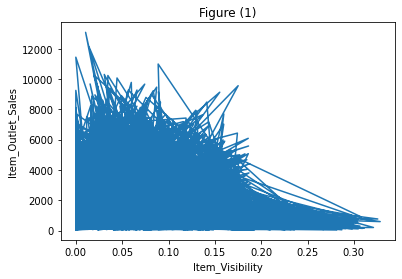

In [ ]:
plt.plot(data['Item_Visibility'], data['Item_Outlet_Sales'])
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.title('Figure (1)')

Text(0.5, 1.0, 'Figure (2)')

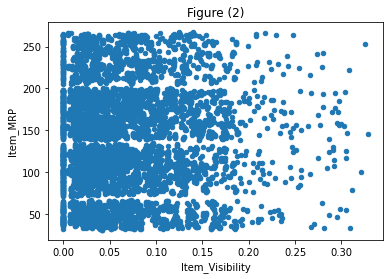

In [ ]:
data.plot(kind="scatter", x="Item_Visibility", y="Item_MRP")
plt.title('Figure (2)')

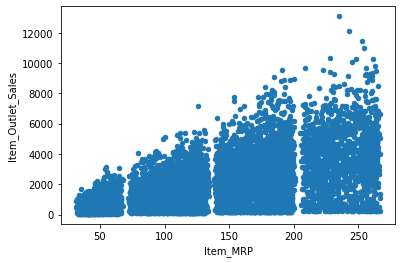

In [ ]:
data.plot(kind="scatter", x="Item_MRP", y="Item_Outlet_Sales")


Text(0.5, 1.0, 'Figure (3)')

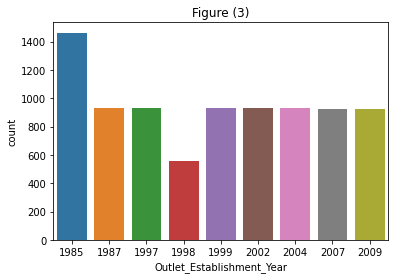

In [ ]:
#sns.histplot(data=data , x='Outlet_Establishment_Year' , color="#ff7f0e" )
sns.countplot(x='Outlet_Establishment_Year', data=data)
plt.title('Figure (3)')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


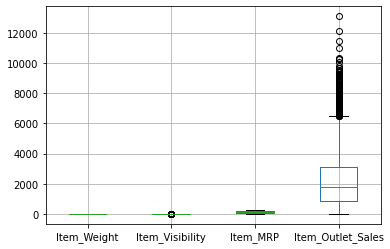

In [ ]:
data.boxplot(column=['Item_Weight','Item_Visibility','Item_MRP', 'Item_Outlet_Sales'])


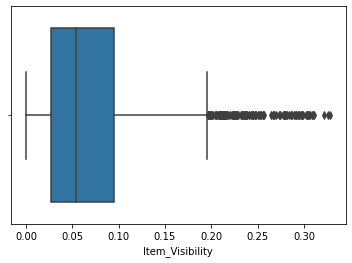

In [ ]:
sns.boxplot(x=data['Item_Visibility'])

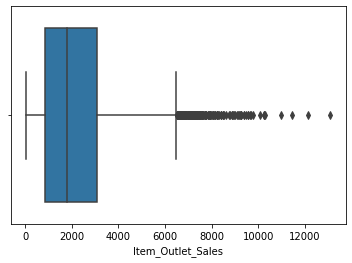

In [ ]:
sns.boxplot(x=data['Item_Outlet_Sales'])

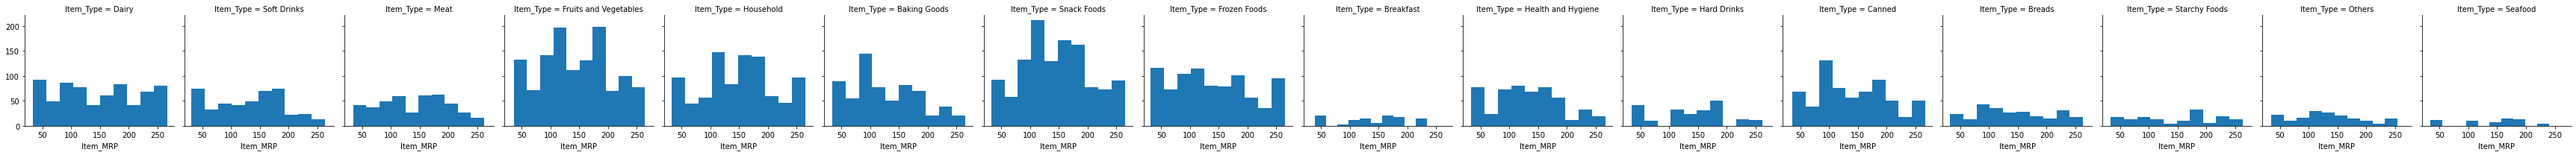

In [ ]:
facetgrid=sns.FacetGrid(data=data ,col='Item_Type' ,height=3 ,aspect=1 )
facetgrid.map(plt.hist ,'Item_MRP')


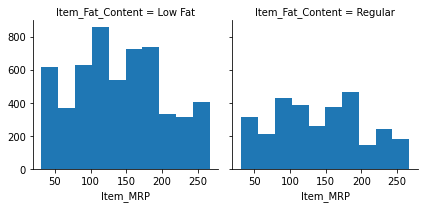

In [ ]:
facetgrid=sns.FacetGrid(data=data ,col='Item_Fat_Content' ,height=3 ,aspect=1 )
facetgrid.map(plt.hist ,'Item_MRP')

 ***Categoral*** 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


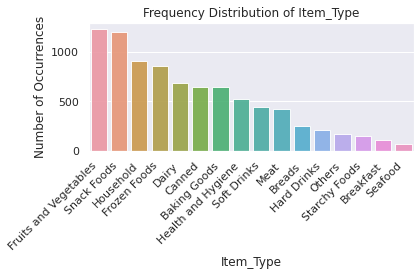

In [ ]:
sns.set(style="darkgrid")
Item_Type_count = data['Item_Type'].value_counts()
ax = sns.barplot(Item_Type_count.index, Item_Type_count.values, alpha=0.9)
plt.title('Frequency Distribution of Item_Type')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Item_Type', fontsize=12)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

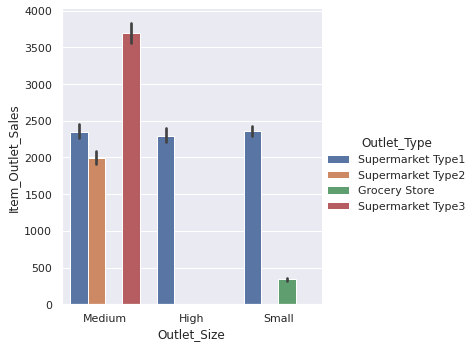

In [ ]:
sns.catplot(x="Outlet_Size", y="Item_Outlet_Sales", hue="Outlet_Type", kind="bar", data=data)

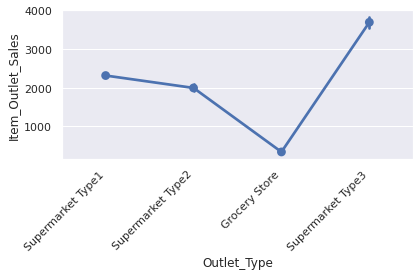

In [ ]:
ax = sns.pointplot(x='Outlet_Type',y='Item_Outlet_Sales', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation= 45, ha="right")
plt.tight_layout()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


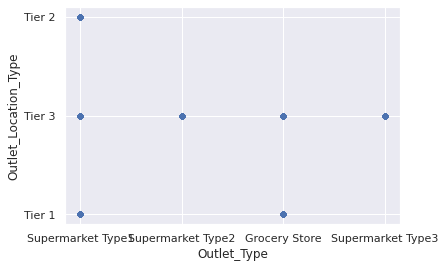

In [ ]:
data.plot(kind="scatter", y="Outlet_Location_Type", x="Outlet_Type")

# Feature Engineering

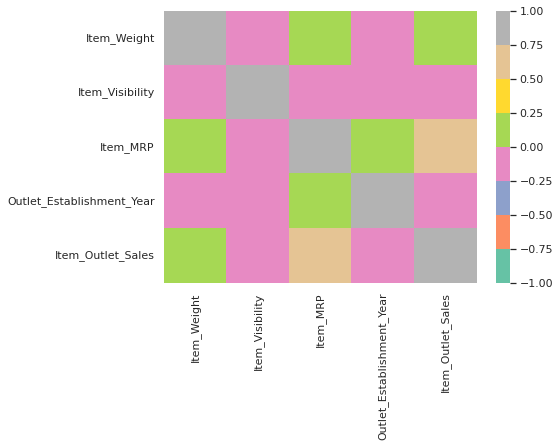

In [ ]:
# Which feature got the most correlation with the target, Drow a correlation plot with all the features

figure(figsize=(7,5))
corr=data.corr()  #calculate the correlation on the data using the pandas .corr( ) function
sns.heatmap(corr , cmap='Set2', vmin=-1 , vmax=1 )  #we pass the corr to the seaborn function heatmap( ) which makes the beautiful plot.
plt.show()

In [ ]:
corr   # Item_MRP is the most correlation with target

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [ ]:
# Create new features from the old ones
data['price_of_one_killo_of_item']=data['Item_MRP']/data['Item_Weight']
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,price_of_one_killo_of_item
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,26.861204
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8.153581
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,8.092457
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,9.484115
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,6.031512


# Let me see how will you fill the missing data :), Try to find a pattern between the missing data and why they are missing if possible

In [ ]:
data.isnull().sum()

Item_Identifier                  0
Item_Weight                   1463
Item_Fat_Content                 0
Item_Visibility                  0
Item_Type                        0
Item_MRP                         0
Outlet_Identifier                0
Outlet_Establishment_Year        0
Outlet_Size                   2410
Outlet_Location_Type             0
Outlet_Type                      0
Item_Outlet_Sales                0
price_of_one_killo_of_item    1463
dtype: int64

***Item_Weight Missing Value***

In [ ]:
means=data.groupby('Item_Identifier').Item_Weight.mean().to_dict()

for i in range(len(data)):
 #if data.loc[i,'Item_Weight'].isnull() == True:
    id = data.loc[i,'Item_Identifier']
    data.loc[i,'Item_Weight']= means[id]


In [ ]:
data.isnull().sum()

Item_Identifier                  0
Item_Weight                      4
Item_Fat_Content                 0
Item_Visibility                  0
Item_Type                        0
Item_MRP                         0
Outlet_Identifier                0
Outlet_Establishment_Year        0
Outlet_Size                   2410
Outlet_Location_Type             0
Outlet_Type                      0
Item_Outlet_Sales                0
price_of_one_killo_of_item    1463
dtype: int64

In [ ]:
data[data['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,price_of_one_killo_of_item
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564,NaN
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280,NaN
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046,NaN
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098,NaN


In [ ]:
data[(data['Item_Type']=='Frozen Foods') & (data['Item_Fat_Content']== 'Regular') ] #-------> Item Weights are not equal

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,price_of_one_killo_of_item
8,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,5.985963
9,FDU28,19.20,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,9.782365
24,FDR28,13.85,Regular,0.025896,Frozen Foods,165.0210,OUT046,1997,Small,Tier 1,Supermarket Type1,4078.0250,11.914874
63,FDY40,15.50,Regular,0.150286,Frozen Foods,51.0692,OUT019,1985,Small,Tier 1,Grocery Store,147.8076,NaN
75,FDC29,8.39,Regular,0.024206,Frozen Foods,114.0176,OUT046,1997,Small,Tier 1,Supermarket Type1,2290.3520,13.589702
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8432,FDI16,14.00,Regular,0.227261,Frozen Foods,54.3640,OUT010,1998,NaN,Tier 3,Grocery Store,159.7920,3.883143
8477,FDC05,13.10,Regular,0.099343,Frozen Foods,198.1768,OUT017,2007,NaN,Tier 2,Supermarket Type1,1970.7680,15.128000
8482,FDZ28,20.00,Regular,0.051702,Frozen Foods,125.8678,OUT018,2009,Medium,Tier 3,Supermarket Type2,763.0068,6.293390
8507,FDN28,5.88,Regular,0.030242,Frozen Foods,101.7990,OUT035,2004,Small,Tier 2,Supermarket Type1,515.9950,17.312755


***Outlet_Size Missing Value***

In [ ]:
for i in range(len(data)):
  if (data.loc[i,'Outlet_Type']=='Grocery Store') is True:
    data.loc[i,'Outlet_Size']


In [ ]:
data.groupby('Outlet_Establishment_Year').Outlet_Size.value_counts()

Outlet_Establishment_Year  Outlet_Size
1985                       Medium         935
                           Small          528
1987                       High           932
1997                       Small          930
1999                       Medium         930
2004                       Small          930
2009                       Medium         928
Name: Outlet_Size, dtype: int64

In [ ]:
for n in range(len(data)):
  if (data.loc[n,'Outlet_Establishment_Year']==1997) | (data.loc[n,'Outlet_Establishment_Year']==1998) | (data.loc[n,'Outlet_Establishment_Year']==2004):
    data.loc[n,'Outlet_Size'] = 'Small'
  if (data.loc[n,'Outlet_Establishment_Year']==1999) | (data.loc[n,'Outlet_Establishment_Year']==2009):
    data.loc[n,'Outlet_Size'] = 'Medium'
  if (data.loc[n,'Outlet_Establishment_Year']==1987):
    data.loc[n,'Outlet_Size'] = 'High'



In [ ]:
data.isnull().sum() # ----------> NAN values found in other yesrs

Item_Identifier                  0
Item_Weight                      4
Item_Fat_Content                 0
Item_Visibility                  0
Item_Type                        0
Item_MRP                         0
Outlet_Identifier                0
Outlet_Establishment_Year        0
Outlet_Size                   1855
Outlet_Location_Type             0
Outlet_Type                      0
Item_Outlet_Sales                0
price_of_one_killo_of_item    1463
dtype: int64

In [ ]:
data[data['Outlet_Size'].isnull()] #-------> 2002 , 2007 ----------> Location: Tier 2 && Outlet Type: Supermarket Type 1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,price_of_one_killo_of_item
8,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,5.985963
9,FDU28,19.20,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,9.782365
25,NCD06,13.00,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080,3.531231
33,FDO23,17.85,Low Fat,0.000000,Breads,93.1436,OUT045,2002,NaN,Tier 2,Supermarket Type1,2174.5028,5.218129
46,NCP05,19.60,Low Fat,0.000000,Health and Hygiene,153.3024,OUT045,2002,NaN,Tier 2,Supermarket Type1,2428.8384,7.821551
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8501,FDW21,5.34,Regular,0.005998,Snack Foods,100.4358,OUT017,2007,NaN,Tier 2,Supermarket Type1,1508.0370,18.808202
8502,NCH43,8.42,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688,25.702993
8508,FDW31,11.35,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646,17.574819
8514,FDA01,15.00,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232,3.839360


In [ ]:
data[(data['Outlet_Type']=='Supermarket Type1') &  (data['Outlet_Location_Type']=='Tier 2')].Outlet_Size.value_counts() #---------->  all Outlet_Size is SMALL

Small    930
Name: Outlet_Size, dtype: int64

In [ ]:
for j in range(len(data)):
  if (data.loc[j,'Outlet_Type']=='Supermarket Type1') &  (data.loc[j,'Outlet_Location_Type']=='Tier 2'):
    data.loc[j,'Outlet_Size'] = 'Small'

In [ ]:
data.isnull().sum()

Item_Identifier                  0
Item_Weight                      4
Item_Fat_Content                 0
Item_Visibility                  0
Item_Type                        0
Item_MRP                         0
Outlet_Identifier                0
Outlet_Establishment_Year        0
Outlet_Size                      0
Outlet_Location_Type             0
Outlet_Type                      0
Item_Outlet_Sales                0
price_of_one_killo_of_item    1463
dtype: int64

In [ ]:
# Create new features from the old ones
data['price_of_one_killo_of_item']=data['Item_MRP']/data['Item_Weight']
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,price_of_one_killo_of_item
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,26.861204
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8.153581
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,8.092457
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,9.484115
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,6.031512


In [ ]:
data.isnull().sum()

Item_Identifier               0
Item_Weight                   4
Item_Fat_Content              0
Item_Visibility               0
Item_Type                     0
Item_MRP                      0
Outlet_Identifier             0
Outlet_Establishment_Year     0
Outlet_Size                   0
Outlet_Location_Type          0
Outlet_Type                   0
Item_Outlet_Sales             0
price_of_one_killo_of_item    4
dtype: int64

In [ ]:
for j in range(len(data)):
  if data.loc[j,'Outlet_Size']=='small':
    data.loc[j,'Outlet_Size']='Small'

In [ ]:
data.Outlet_Size.value_counts()

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
# Drop 4 rows that have Missing value in (Item_Weight)

# 0 for rows and 1 for columns
data.dropna(subset=['Item_Weight'], inplace=True)

***Convert Categorical Features to Numeric Quantities***

In [ ]:
data.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [ ]:
# Label Encoder

encoded_columns={'Outlet_Size':{'Medium':1, 'Small':2, 'High':3},
                 'Outlet_Location_Type':{'Tier 1':1, 'Tier 3':3, 'Tier 2':2},
                 'Item_Fat_Content':{'Low Fat':2, 'Regular':1}}
data.replace(encoded_columns,inplace=True)

In [ ]:
# OneHot Evcoder

data=pd.get_dummies(data,columns=['Item_Type','Outlet_Type'])

In [ ]:
# Drop ID columns

data = data.drop(['Item_Identifier','Outlet_Identifier'],axis=1)   # 0 for rows and 1 for columns

In [ ]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,price_of_one_killo_of_item,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,2,0.016047,249.8092,1999,1,1,3735.1380,26.861204,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,5.92,1,0.019278,48.2692,2009,1,3,443.4228,8.153581,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,17.50,2,0.016760,141.6180,1999,1,1,2097.2700,8.092457,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,19.20,1,0.000000,182.0950,1998,2,3,732.3800,9.484115,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,8.93,2,0.000000,53.8614,1987,3,3,994.7052,6.031512,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


# Split the data into train and test without using any library (Use only numpy)

In [ ]:
import numpy as np

train ,test = np.split(data.sample(frac= 1) , [int(0.7 * len(data))])

In [ ]:
train_values= train.values

y_train = train ['Item_Outlet_Sales']
x_train = train.drop('Item_Outlet_Sales' , axis =1)


In [ ]:
test_values= test.values

y_test = test ['Item_Outlet_Sales']
x_test = test.drop('Item_Outlet_Sales' , axis =1)

# Build a machine learning model and find the accuracy on the test data

***Linear Regression***

In [ ]:
from sklearn.linear_model import LinearRegression

Linear_Reg= LinearRegression()
Linear_Reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
prediction_1 = Linear_Reg.predict(x_test)
acc_1 = round(Linear_Reg.score(x_test , y_test)*100)
acc_1

58

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test , prediction_1)
r2

0.5792343801146751

In [ ]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, prediction_1)
RMSE = np.sqrt(MSE)
RMSE

1097.4188161023922

***Decision Tree Regression***

In [ ]:
from sklearn.tree import DecisionTreeRegressor

DesTree = DecisionTreeRegressor()
DesTree.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
prediction_2 = DesTree.predict(x_test)
acc_2 = round(DesTree.score(x_test , y_test)*100)
acc_2

24

In [ ]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, prediction_2)
RMSE = np.sqrt(MSE)
RMSE

1472.0939679566934

***Random Forest Regression***

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RanForest = RandomForestRegressor()
RanForest.fit(x_train , y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
prediction_3 = RanForest.predict(x_test)
acc_3 = round(DesTree.score(x_test , y_test)*100)
acc_3

24

In [ ]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, prediction_3)
RMSE = np.sqrt(MSE)
RMSE

1095.8037730510225

# Find something in the data that I didn't ask you to find and give me some hypothesis about it